# Spam or Ham Comment Classification using Naive Bayes

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing

In [2]:
!ls

 comment_spam.csv    doc.pdf	 'News Title.xls'   'Task Data Scientist.doc'
'Comment Spam.xls'   news.csv	  spam-Copy1.ipynb
 doc.doc	     news.ipynb   spam.ipynb


In [3]:
comments = pd.read_csv('comment_spam.csv')

In [4]:
comments = comments[['Comment', 'Class']]
comments.head()

,Comment,Class
0,this song is racist,0
1,and how many subscribers compared to her over ...,1
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
3,well done shakira,0
4,:D subscribe to me for daily vines,1


Ganti 0 jadi ham, 1 jadi spam

In [5]:
comments = comments.replace({0 : 'ham', 1 : 'spam'})
comments.head()

,Comment,Class
0,this song is racist,ham
1,and how many subscribers compared to her over ...,spam
2,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,spam
3,well done shakira,ham
4,:D subscribe to me for daily vines,spam


In [6]:
comments.groupby('Class').describe()

Comment                                               
        count unique                                top freq
Class                                                       
ham       631    612                        Shakira :-*    4
spam      669    550  Check out this video on YouTube:﻿   74

# Cek sebaran class ham dan spam
pada dataset kali ini sebaran classnya hampir sama, jadi untuk fature yang diperlukan sudah cukup

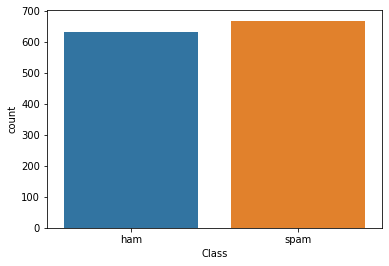

In [7]:
sns.countplot(data=comments, x='Class')

# Data Normalization
menggunakan punctuation, stopwords removal, dan stemming

In [8]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
def process(text):
    # lowercase it
    text = text.lower()
    # remove punctuation
    text = ''.join([t for t in text if t not in string.punctuation])
    # remove stopwords
    text = [t for t in text.split() if t not in stopwords.words('english')]
    # stemming
    st = Stemmer()
    text = [st.stem(t) for t in text]
    # return token list
    return text

Sebelum dinormalize

In [9]:
comments['Comment'][:5]

0                                  this song is racist
1    and how many subscribers compared to her over ...
2    HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...
3                                    well done shakira
4                   :D subscribe to me for daily vines
Name: Comment, dtype: object

Sesudah dinormalize

In [10]:
comments['Comment'][:5].apply(process)

0                            [song, racist]
1         [mani, subscrib, compar, million]
2    [hi, check, awesom, cover, say, think]
3                     [well, done, shakira]
4                   [subscrib, daili, vine]
Name: Comment, dtype: object

# Feature axtraction TfidfVectorizer
Convert value dati fitur 'Comment' menjadi matrix 2D

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(comments['Comment'])

In [12]:
comm = comments.iloc[2]['Comment']
print(comm)

HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT YOU THINK!


In [13]:
print(tfidfv.transform([comm]))

  (0, 2607)	0.4438203590475181
  (0, 2258)	0.47117167601979804
  (0, 1193)	0.4349649487983427
  (0, 626)	0.4129135837107971
  (0, 508)	0.19758205827886377
  (0, 302)	0.4269542558189061


In [14]:
j = tfidfv.transform([comm]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(j)):
    if [i] != 0:
        print(i, format(tfidfv.idf_[i], '.4f'), format(j[i], '.4f'), tfidfv.get_feature_names()[i],sep='\t')


index	idf	tfidf	term
0	6.7846	0.0000	0
1	7.4777	0.0000	0058
2	7.4777	0.0000	025
3	7.4777	0.0000	04
4	7.4777	0.0000	0687119038
5	4.8751	0.0000	1
6	6.3791	0.0000	10
7	5.7730	0.0000	100
8	7.4777	0.0000	1000
9	7.4777	0.0000	1000000
10	6.5615	0.0000	1000000000
11	7.4777	0.0000	100100﻿
12	7.4777	0.0000	1030
13	7.4777	0.0000	108k
14	7.4777	0.0000	109
15	7.4777	0.0000	11
16	7.4777	0.0000	111
17	7.4777	0.0000	113
18	7.4777	0.0000	11th
19	7.4777	0.0000	128gb
20	7.0723	0.0000	13
21	7.0723	0.0000	1337
22	7.4777	0.0000	139
23	6.5615	0.0000	14
24	7.4777	0.0000	14000000
25	5.6059	0.0000	15
26	7.4777	0.0000	157
27	6.5615	0.0000	16
28	7.4777	0.0000	16gb
29	6.7846	0.0000	17
30	7.4777	0.0000	1700000000
31	7.0723	0.0000	17yr
32	7.4777	0.0000	1855mm
33	7.4777	0.0000	1884034783
34	6.7846	0.0000	19
35	7.4777	0.0000	1billiom
36	7.4777	0.0000	1billion
37	7.4777	0.0000	1fhenqx1twqm153v2ptayiejnealahzvem﻿
38	7.4777	0.0000	1hmvtxbr
39	7.4777	0.0000	1hmvtx﻿
40	7.4777	0.0000	1it
41	7.4777	0.0000	1k
42	7.0723	0.0000

368	7.4777	0.0000	bewatch
369	7.4777	0.0000	bf4
370	6.5615	0.0000	bieber
371	6.0914	0.0000	big
372	7.4777	0.0000	bigboss286﻿
373	7.4777	0.0000	bigelow
374	7.4777	0.0000	bigger
375	7.4777	0.0000	bighit
376	7.4777	0.0000	bikini﻿
377	7.4777	0.0000	bilion
378	4.7369	0.0000	billion
379	6.7846	0.0000	billion﻿
380	7.4777	0.0000	billsand
381	7.4777	0.0000	bing
382	6.5615	0.0000	birthday
383	7.4777	0.0000	birthday﻿
384	7.0723	0.0000	bit
385	6.7846	0.0000	bitch
386	7.4777	0.0000	bitcoin
387	7.4777	0.0000	bite
388	7.4777	0.0000	bitly14gkvdo
389	7.4777	0.0000	bitly1bsefq
390	7.4777	0.0000	bitlymakemoneywithoutadroid
391	6.7846	0.0000	black
392	7.4777	0.0000	black﻿
393	7.0723	0.0000	blast
394	6.0914	0.0000	bless
395	7.4777	0.0000	bless﻿
396	7.4777	0.0000	block
397	7.4777	0.0000	blog
398	7.4777	0.0000	blond
399	6.7846	0.0000	blow
400	7.4777	0.0000	blue
401	7.4777	0.0000	blue﻿
402	7.4777	0.0000	blush
403	7.4777	0.0000	boa
404	7.4777	0.0000	boacon
405	7.4777	0.0000	bocilil
406	7.4777	0.0000	bodi
407	7

730	7.4777	0.0000	discusss
731	6.2250	0.0000	dislik
732	7.4777	0.0000	disliked😯﻿
733	7.4777	0.0000	dislikesep
734	7.4777	0.0000	dislikesssssssssssssssssssssssssssssssss﻿
735	7.4777	0.0000	disord
736	7.4777	0.0000	dispos
737	7.4777	0.0000	distribut
738	7.4777	0.0000	dive
739	7.4777	0.0000	divin
740	7.4777	0.0000	divorc
741	7.4777	0.0000	diy
742	7.0723	0.0000	dj
743	7.4777	0.0000	djj
744	7.4777	0.0000	dna
745	7.4777	0.0000	doctor
746	7.4777	0.0000	doe
747	6.7846	0.0000	doesn39t
748	6.5615	0.0000	doesnt
749	7.4777	0.0000	dog
750	6.3791	0.0000	dollar
751	7.4777	0.0000	domin
752	5.3377	0.0000	don39t
753	6.2250	0.0000	donat
754	6.2250	0.0000	done
755	4.8036	0.0000	dont
756	6.2250	0.0000	don’t
757	7.0723	0.0000	dope
758	7.4777	0.0000	dopethat39
759	6.2250	0.0000	download
760	7.4777	0.0000	do﻿
761	7.0723	0.0000	dragon
762	7.4777	0.0000	dragonsand
763	7.0723	0.0000	drake
764	7.4777	0.0000	drama
765	4.9520	0.0000	dream
766	7.4777	0.0000	dreamer
767	7.4777	0.0000	dreamhelp
768	7.4777	0.0000	dream

1072	4.2997	0.0000	go
1073	5.9737	0.0000	goal
1074	7.4777	0.0000	goal100
1075	5.5318	0.0000	god
1076	7.4777	0.0000	god’
1077	7.4777	0.0000	god﻿
1078	7.4777	0.0000	gogopo
1079	7.4777	0.0000	going﻿
1080	7.4777	0.0000	gold
1081	7.4777	0.0000	golden
1082	7.4777	0.0000	gone
1083	5.8683	0.0000	gonna
1084	4.4820	0.0000	good
1085	7.4777	0.0000	goodbye﻿
1086	7.4777	0.0000	goodlook
1087	6.5615	0.0000	good﻿
1088	5.8683	0.0000	googl
1089	7.4777	0.0000	gook
1090	7.4777	0.0000	goonrock﻿
1091	7.4777	0.0000	gooooood﻿
1092	7.4777	0.0000	goos
1093	7.4777	0.0000	goosebump
1094	7.4777	0.0000	goot﻿
1095	7.4777	0.0000	goo…
1096	7.4777	0.0000	gorg
1097	7.4777	0.0000	gorlingoltz
1098	5.6860	0.0000	got
1099	7.4777	0.0000	gotta
1100	7.0723	0.0000	gotten
1101	7.4777	0.0000	govern
1102	7.4777	0.0000	government﻿
1103	7.4777	0.0000	go﻿
1104	7.4777	0.0000	grace
1105	7.4777	0.0000	grass
1106	7.4777	0.0000	grate
1107	7.4777	0.0000	grave
1108	5.2805	0.0000	great
1109	7.4777	0.0000	greatest
1110	7.4777	0.0000	greatli
11

1294	7.4777	0.0000	httpstwittercomthewaxedhatco﻿
1295	7.4777	0.0000	httpsviralangelscomuserd4aaacwk﻿
1296	7.4777	0.0000	httpswwwchangeorgpfacebooktwitteryoutubedonotcensorjulienblanc
1297	7.4777	0.0000	httpswwwfacebookcomexagdlphotosa9368685796602841073741943111719098841907937732262907249type1amptheat
1298	7.4777	0.0000	httpswwwfacebookcomfudairyqueenpnrefstory﻿
1299	7.4777	0.0000	httpswwwfacebookcomgorlingoltzsupport﻿
1300	7.4777	0.0000	httpswwwfacebookcomlists161620527267482﻿
1301	7.4777	0.0000	httpswwwfacebookcommarcossousa4frefts﻿
1302	7.4777	0.0000	httpswwwfacebookcommyfunnyriddles﻿
1303	7.4777	0.0000	httpswwwfacebookcompagesbrewcrew2014134470083389909
1304	7.4777	0.0000	httpswwwfacebookcompagesd8aad8add985d98ad984d8a7d8acd985d984d8a7d984d8a7d985d988d8b3d98ad982d989music674732645945877
1305	7.4777	0.0000	httpswwwfacebookcompagesmathsterwp1495323920744243refhl﻿
1306	7.4777	0.0000	httpswwwfacebookcomprofilephpid100007085325116﻿
1307	7.4777	0.0000	httpswwwindiegogocomprojectscleaning

1521	6.7846	0.0000	kinda
1522	7.0723	0.0000	king
1523	7.4777	0.0000	kitten
1524	7.0723	0.0000	kitti
1525	6.7846	0.0000	kld3i
1526	7.4777	0.0000	kluivert
1527	7.4777	0.0000	knew
1528	4.3867	0.0000	know
1529	7.4777	0.0000	knowledg
1530	7.0723	0.0000	known
1531	7.4777	0.0000	kobyoshi02
1532	7.4777	0.0000	kodalin
1533	7.4777	0.0000	kollektivet
1534	7.0723	0.0000	korea
1535	7.0723	0.0000	korean
1536	7.4777	0.0000	kpop
1537	7.4777	0.0000	k﻿
1538	6.0914	0.0000	l
1539	6.7846	0.0000	la
1540	7.4777	0.0000	lack
1541	7.4777	0.0000	lad
1542	7.4777	0.0000	lada😂﻿
1543	5.9737	0.0000	lake
1544	7.0723	0.0000	lame
1545	7.0723	0.0000	lana
1546	7.0723	0.0000	land
1547	7.4777	0.0000	languag
1548	7.4777	0.0000	languages﻿
1549	7.4777	0.0000	language﻿
1550	7.4777	0.0000	lanta﻿
1551	7.4777	0.0000	larg
1552	6.3791	0.0000	last
1553	7.0723	0.0000	later
1554	5.9737	0.0000	latest
1555	7.4777	0.0000	latinoamerica﻿
1556	6.3791	0.0000	laugh
1557	7.4777	0.0000	laughabl
1558	7.4777	0.0000	launchpad
1559	6.7846	0.0000	lau

1857	7.4777	0.0000	nicer
1858	6.3791	0.0000	nice﻿
1859	7.4777	0.0000	nick
1860	7.4777	0.0000	niggas﻿
1861	6.7846	0.0000	night
1862	7.4777	0.0000	nikki
1863	7.0723	0.0000	niko
1864	7.4777	0.0000	niko20130926t220043613000hey
1865	7.4777	0.0000	nikon
1866	7.4777	0.0000	nirvanatrust
1867	7.0723	0.0000	nobodi
1868	7.4777	0.0000	noi
1869	7.4777	0.0000	nois
1870	7.4777	0.0000	noise﻿
1871	7.4777	0.0000	nokia
1872	7.4777	0.0000	nonasian
1873	7.0723	0.0000	nonsens
1874	7.4777	0.0000	noodil
1875	7.4777	0.0000	normal
1876	7.4777	0.0000	norru
1877	7.4777	0.0000	northland
1878	7.4777	0.0000	notch
1879	7.4777	0.0000	note
1880	5.6860	0.0000	noth
1881	7.4777	0.0000	nothingpleas
1882	7.4777	0.0000	notic
1883	7.0723	0.0000	notori
1884	7.4777	0.0000	nowplay
1885	7.0723	0.0000	now﻿
1886	7.4777	0.0000	noxu
1887	7.4777	0.0000	nuketown
1888	6.3791	0.0000	number
1889	7.4777	0.0000	numberless
1890	7.4777	0.0000	nummber
1891	7.4777	0.0000	nut
1892	7.4777	0.0000	nuts﻿
1893	7.4777	0.0000	nvmthe
1894	7.4777	0.0000	

2180	7.4777	0.0000	reminisc
2181	5.9737	0.0000	remix
2182	7.4777	0.0000	remov
2183	7.4777	0.0000	render
2184	7.4777	0.0000	repair
2185	7.4777	0.0000	repass
2186	7.4777	0.0000	repay
2187	6.7846	0.0000	replay
2188	7.4777	0.0000	republ
2189	7.4777	0.0000	requit
2190	7.0723	0.0000	resort
2191	7.4777	0.0000	respect
2192	7.4777	0.0000	respond
2193	6.7846	0.0000	respons
2194	7.4777	0.0000	retain
2195	7.4777	0.0000	retard
2196	7.4777	0.0000	retriev
2197	7.4777	0.0000	revel
2198	6.7846	0.0000	review
2199	7.4777	0.0000	reward
2200	7.0723	0.0000	rey
2201	7.4777	0.0000	rhythm
2202	7.4777	0.0000	rich
2203	7.4777	0.0000	richest
2204	7.4777	0.0000	rid
2205	5.6059	0.0000	right
2206	7.4777	0.0000	righteous
2207	7.4777	0.0000	right﻿
2208	7.0723	0.0000	rihana
2209	5.6059	0.0000	rihanna
2210	7.4777	0.0000	rihanna﻿
2211	6.2250	0.0000	rile
2212	7.4777	0.0000	ring
2213	7.4777	0.0000	riri
2214	7.4777	0.0000	rise
2215	7.0723	0.0000	risk
2216	7.4777	0.0000	rmontageparodiesbr
2217	7.4777	0.0000	roaaaaarrrrrr
221

2511	7.0723	0.0000	substanti
2512	7.4777	0.0000	subs﻿
2513	7.4777	0.0000	succe
2514	5.5318	0.0000	success
2515	6.2250	0.0000	suck
2516	7.0723	0.0000	sucks﻿
2517	7.4777	0.0000	suck﻿
2518	7.4777	0.0000	sucscrib
2519	7.4777	0.0000	suddenli
2520	7.0723	0.0000	suffer
2521	7.4777	0.0000	suicid
2522	7.4777	0.0000	suit
2523	7.4777	0.0000	summer
2524	7.4777	0.0000	sup
2525	6.2250	0.0000	super
2526	7.4777	0.0000	superbowl
2527	7.4777	0.0000	superr﻿
2528	7.4777	0.0000	superstar
2529	7.4777	0.0000	super﻿
2530	7.4777	0.0000	supper
2531	5.9737	0.0000	support
2532	7.4777	0.0000	support﻿
2533	7.4777	0.0000	suppos
2534	7.4777	0.0000	suprem
2535	6.5615	0.0000	sure
2536	7.4777	0.0000	sure﻿
2537	7.4777	0.0000	surgeri
2538	7.4777	0.0000	surpass
2539	6.7846	0.0000	survey
2540	6.5615	0.0000	surviv
2541	6.5615	0.0000	suscrib
2542	7.4777	0.0000	suscribit
2543	7.4777	0.0000	suscríbas
2544	7.0723	0.0000	swagfriend
2545	7.4777	0.0000	swamp
2546	7.0723	0.0000	swear
2547	7.4777	0.0000	sweet
2548	7.0723	0.0000	swift

2824	7.4777	0.0000	wavelength
2825	4.7369	0.0000	way
2826	7.0723	0.0000	wazzasoft
2827	7.4777	0.0000	weak
2828	7.0723	0.0000	wear
2829	6.5615	0.0000	web
2830	4.5600	0.0000	websit
2831	7.4777	0.0000	weekend
2832	7.4777	0.0000	weekendmix
2833	7.4777	0.0000	weekli
2834	7.4777	0.0000	weight
2835	7.0723	0.0000	weird
2836	6.5615	0.0000	welcom
2837	6.0914	0.0000	well
2838	7.4777	0.0000	wellcomemdblogfacom
2839	7.4777	0.0000	well﻿
2840	7.0723	0.0000	what
2841	7.0723	0.0000	whatev
2842	7.4777	0.0000	whatuknow
2843	7.4777	0.0000	wheel
2844	7.4777	0.0000	whenev
2845	7.0723	0.0000	white
2846	6.7846	0.0000	whitney
2847	7.4777	0.0000	who
2848	7.0723	0.0000	who39
2849	6.2250	0.0000	whole
2850	7.4777	0.0000	whore﻿
2851	7.0723	0.0000	whose
2852	7.4777	0.0000	wicked
2853	6.3791	0.0000	wide
2854	7.4777	0.0000	wierd
2855	7.4777	0.0000	wife
2856	7.4777	0.0000	wifi4g
2857	7.4777	0.0000	wil
2858	7.0723	0.0000	will
2859	7.4777	0.0000	wilsubscrib
2860	5.9737	0.0000	win
2861	7.0723	0.0000	wind
2862	7.4777	0.000

# Train Model

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=process)), # messages to weighted TFIDF score
    ('classifier', MultinomialNB())                    # train on TFIDF vectors with Naive Bayes
])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(comments['Comment'], comments['Class'], test_size=0.10, random_state = 21)

# Train spam_filter

In [17]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer=<function process at 0x7ff7c862b840>, binary=False,
        decode_error='strict', dtype=<class 'numpy.float64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

# Uji hasil prediksi

In [18]:
predictions = spam_filter.predict(x_test)

In [19]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] != predictions[i]:
        count += 1
print('Total Jumlah ', len(y_test))
print('Number of wrong of predictions', count)

Total Jumlah  130
Number of wrong of predictions 16


In [20]:
x_test[y_test != predictions]

272     Wow justin Bieber is Better  thats why when he...
815     You know a song sucks dick when you need to us...
218     Share this video.. This song can beat PSY - Ga...
997     EVERYBODY PLEASE VOTE KATY AT EMA 2014 !!!!!  ...
623                   The most liked video on YouTube...﻿
426                                   Great music anyway﻿
939                                         likeeeeeeeee﻿
934     http://hackfbaccountlive.com/?ref=4436607  psy...
369     Discover a beautiful song of A young Moroccan ...
708     You exactly who u want to be,watching your fav...
1209    Thanks to this video we know that Nokia phones...
930                          Sick Music for sick females﻿
1036    Since she is a feminist champion, why would sh...
853             +447935454150 lovely girl talk to me xxx﻿
659     Eminem rap can be easy for a boy but I can do ...
767                                   So freaking sad...﻿
Name: Comment, dtype: object

In [21]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       0.84      0.89      0.86        57
        spam       0.91      0.86      0.89        73

   micro avg       0.88      0.88      0.88       130
   macro avg       0.87      0.88      0.88       130
weighted avg       0.88      0.88      0.88       130



In [22]:
def detect_spam(spam):
    return spam_filter.predict([spam])[0]
#detect_spam('You want to see my picture? follow my acoount @bootystar')
detect_spam('Wow shakira, you are great, ilove you')

'ham'

In [23]:
detect_spam('check out out new catalogue')

'spam'